## STUDENT PERFORMANCE INDICATOR

### Life Cycle of Machine Learning Project
 - Understanding the problem statement   <br>
 - Data collection   <br>
 - Data Checks to perform   <br>
 - Exploratory Data analysis   <br>
 - Data Pre-Processing  <br>
 - Model Training  <br>
 * Choose best model

### **1) Problem Statement** 
 - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### **2) Data Collection**
 - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
 - The data consists of 8 column and 1000 rows.

### **3) Importing necessory libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Import necessory data file

In [2]:
pwd

'D:\\1. Data Science\\10.  Projects\\ML Project1'

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
# shape of the dataset
df.shape

(1000, 8)

### Dataset information
 - gender : sex of students -> (Male/female)  <br>
 - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E) <br>
 - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's      degree,high school) <br>
 - lunch : having lunch before test (standard or free/reduced) <br>
 - test preparation course : complete or not complete before test <br>
 - math score <br>
 - reading score <br>
 - writing score <br>
 
 
### Checks to Perform
 - Check Missing values <br>
 - Check Duplicates <br>
 - Check data type <br>
 - Check the number of unique values of each column <br>
 - Check statistics of data set <br>
 - Check various categories present in the different categorical column <br>
 
### Checking missing values

In [6]:
df.isna().sum()
# means there is no any missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check Duplicates

In [7]:
df.duplicated().sum()
# there is no any duplicate value

0

### Checking of data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking Unique of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Checking statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
 - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 - All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Exploring data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Idenfying unique values

In [12]:
print('Categories in "gender" variable: ',end=" ")
print(df['gender'].unique())

print('Categories in "race_ethnicity" variable: ',end=" ")
print(df['race/ethnicity'].unique())

print('categories in "Parental level of education" variable: ',end=" ")
print(df['parental level of education'].unique())

print('Categories in "Lunch" variable: ',end=" ")
print(df['lunch'].unique())

print('Categories in "test preparation Corse: " variable: ',end=" ")
print(df['test preparation course'].unique())

Categories in "gender" variable:  ['female' 'male']
Categories in "race_ethnicity" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in "Parental level of education" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "Lunch" variable:  ['standard' 'free/reduced']
Categories in "test preparation Corse: " variable:  ['none' 'completed']


### Define numerical and categorical columns

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [14]:
print(numeric_features)

['math score', 'reading score', 'writing score']


In [15]:
print(categorical_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
# printing numerical and catogorical columns
f'We have {len(numeric_features)} numerical columns {numeric_features}'

"We have 3 numerical columns ['math score', 'reading score', 'writing score']"

In [17]:
f'we have {len(categorical_features)} categorical features {categorical_features}'

"we have 5 categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']"

In [18]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Adding columns for "Total Score " and "Average"

In [19]:
df["Total Score"] = df['math score'] + df['reading score'] + df['writing score']


In [20]:
df["Average"]= df["Total Score"]/3

In [21]:
# printing newly created columns
df.head(2) 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [22]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]["Average"].count()
math_full = df[df['math score']==100]["Average"].count()

In [23]:
print("number of students with full marks: ",math_full)
print("number of students with full marks in reading: ",reading_full)
print("number of students with full marks in  writing", writing_full)

number of students with full marks:  7
number of students with full marks in reading:  17
number of students with full marks in  writing 14


In [24]:
reading_less_20 = df[df['reading score']<=20]["Average"].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

In [25]:
print("Number of students scored less than 20 marks in reading: ",reading_less_20)
print("Number of students scored less than 20 marks in writing: ",writing_less_20)
print("Number of students scored less than 20 marks in maths: ",math_less_20)

Number of students scored less than 20 marks in reading:  1
Number of students scored less than 20 marks in writing:  3
Number of students scored less than 20 marks in maths:  4


### Insights

from the above values, we got students who have performed the worst in maths. <br>
we can say that the best performance is in the reading sections

## 4) Exploring Data Visualisation

### 4.1) Visualise average score distribution to make some conclusions 

 - Histogram
 - Kernam Density Function(KDE)

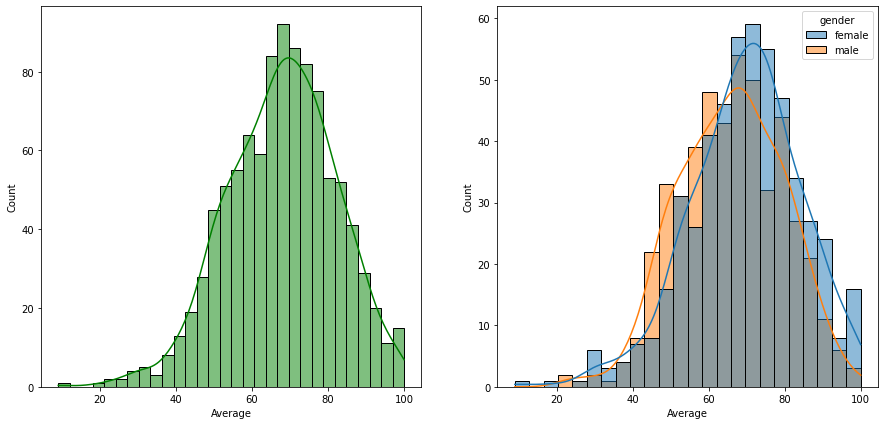

In [26]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

### Conclusion
 - Its conclude female is performing well than men

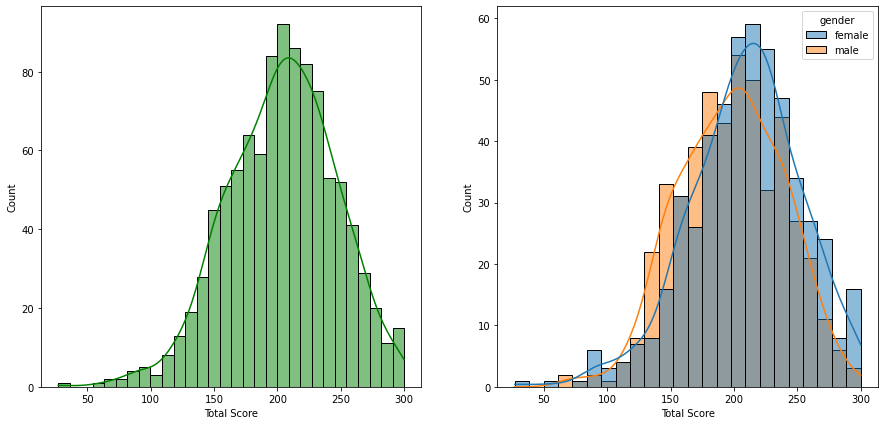

In [27]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', kde=True, hue='gender')
plt.show()

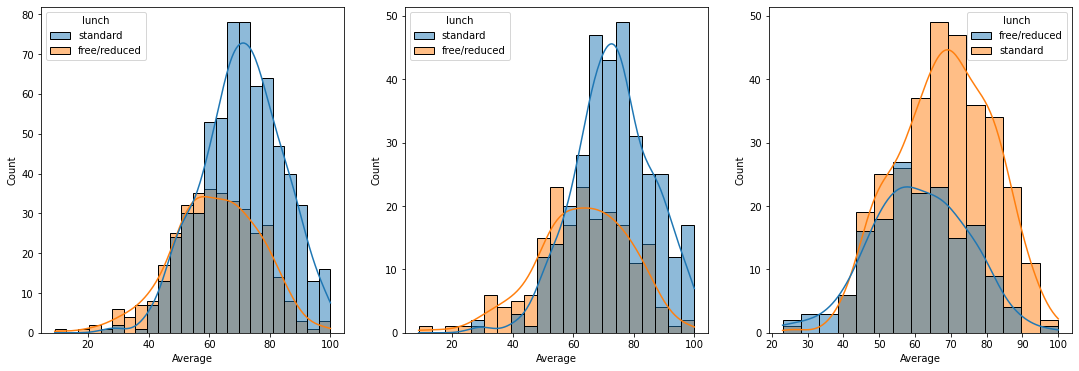

In [28]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df, x="Average",kde= True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="Average",kde=True, hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"], x="Average",kde=True, hue="lunch")
plt.show()

### Insights
 - standard lunch affects in performance in the exam
 - Standard lunch helps perform well in exams be it a male or a female.

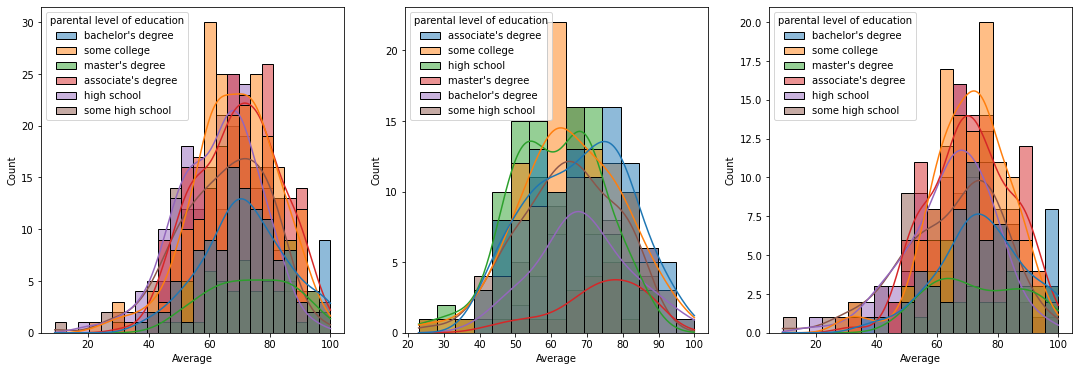

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax= sns.histplot(data=df, x="Average",kde= True, hue="parental level of education")
plt.subplot(142)
ax= sns.histplot(data=df[df.gender=="male"], x="Average",kde= True, hue="parental level of education")
plt.subplot(143)
ax= sns.histplot(data=df[df.gender=="female"], x="Average",kde= True, hue="parental level of education")
plt.show()

### Insights
 - In general parent's education don't help student perform well in exam.
 - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
 - 3rd plot we can see there is no effect of parent's education on female students.

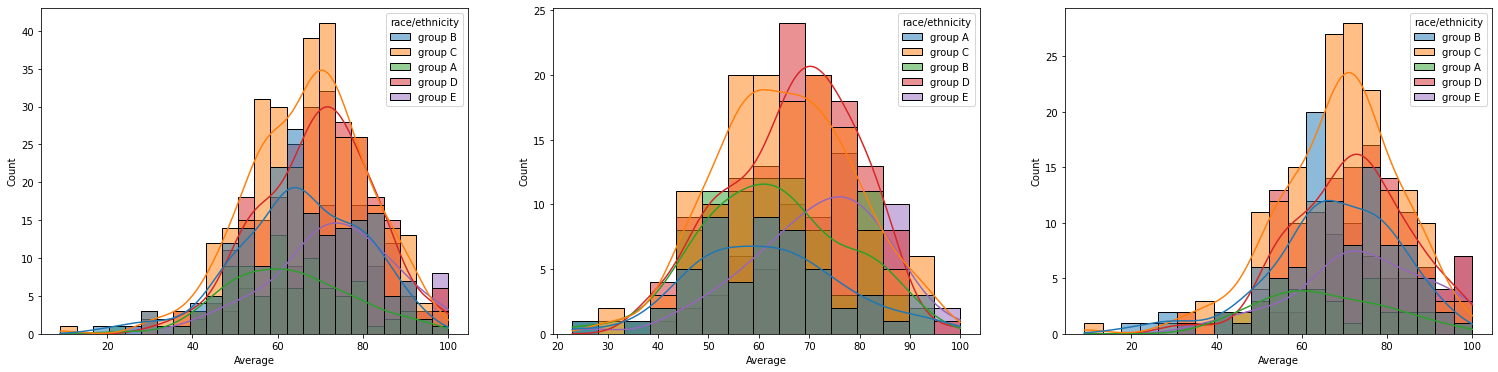

In [30]:
plt.subplots(1,3,figsize=(26,6))
plt.subplot(131)
ax=sns.histplot(data=df, x="Average", kde=True,hue= 'race/ethnicity')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=="male"], x="Average", kde=True,hue= 'race/ethnicity')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=="female"], x="Average", kde=True,hue= 'race/ethnicity')
plt.show()

### Insights
 - Students of group A and group B tends to perform poorly in exam.
 - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum Score of student in all three subjects

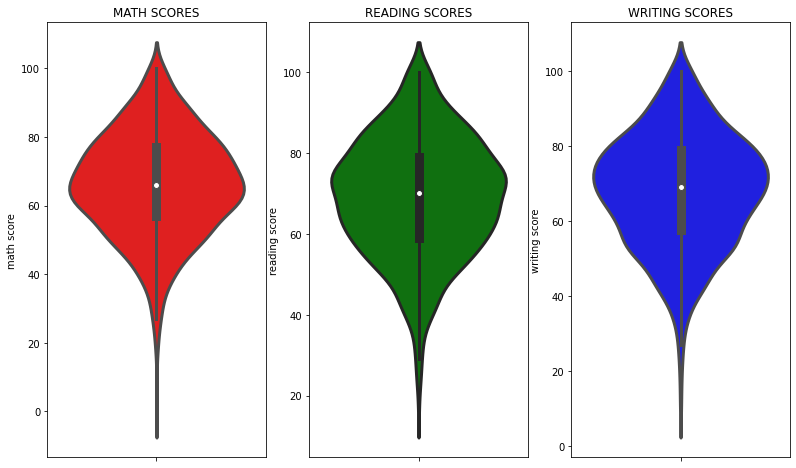

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title("MATH SCORES")
sns.violinplot(y='math score', data=df, color='red',linewidth=3)
plt.subplot(142)
plt.title("READING SCORES")
sns.violinplot(y='reading score', data=df, color='green',linewidth=3)
plt.subplot(143)
plt.title("WRITING SCORES")
sns.violinplot(y='writing score', data=df, color='blue',linewidth=3)
plt.show()

#### Insights

 - from the above three plots its clearly visible that most of student scores in between 60-80 in maths whereas in reading and writing most of them score from 50-80. 

### 4.3 Multivariate analysis using pieplot

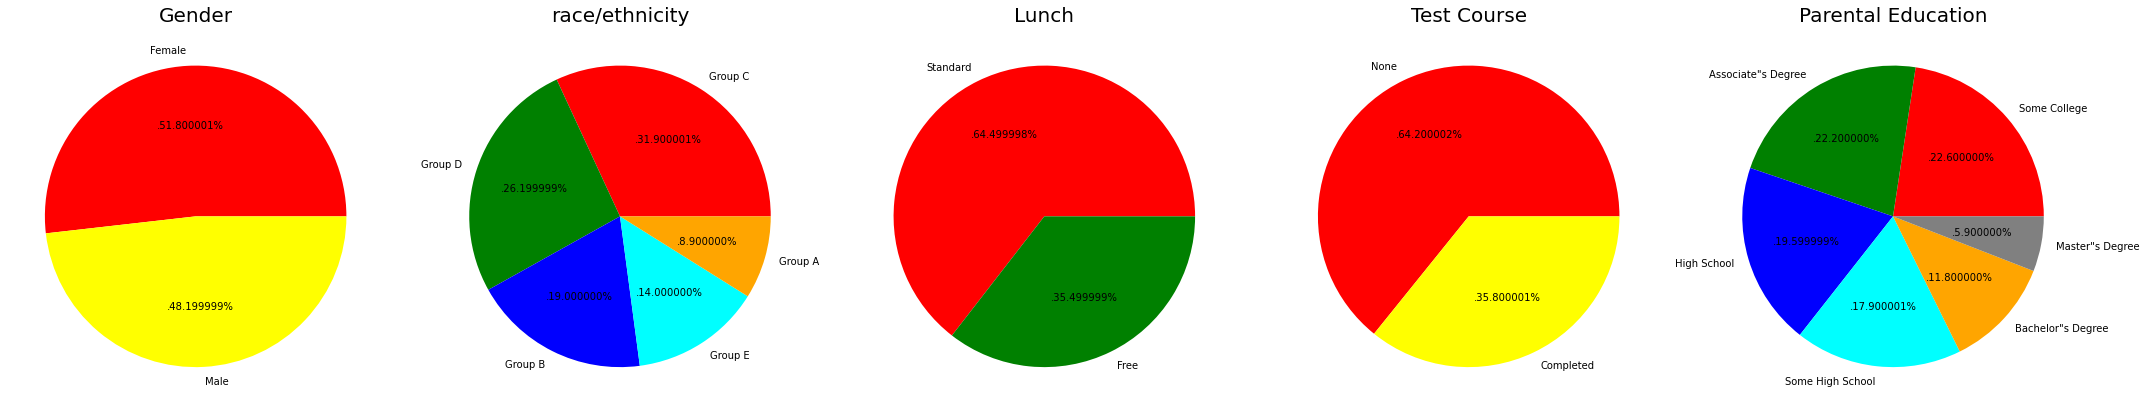

In [32]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size= df['gender'].value_counts()
labels= 'Female','Male'
color= ['red','yellow']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(152)
size= df['race/ethnicity'].value_counts()
labels= 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color= ['red','green','blue','cyan','orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(153)
size= df['lunch'].value_counts()
labels= 'Standard','Free'
color= ['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')


plt.subplot(154)
size= df['test preparation course'].value_counts()
labels= 'None','Completed'
color= ['red','yellow']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(155)
size= df['parental level of education'].value_counts()
labels= 'Some College','Associate"s Degree','High School','Some High School','Bachelor"s Degree','Master"s Degree'
color=['red', 'green', 'blue', 'cyan', 'orange', 'gray']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

### Insights
 - Number of male and female students is almost equal.
 - Number of students are greatest in group C.
 - Number of students who have standard lunch are greater. 
 - Number of students who have not enrolled in any test preparation course is greater. 
 - Number of students whose parental education is Some College is greater followed closely by Associate College

### Feature wise Visualisation
 - **1) Gender Column**
     - How is distribution of gender.
     - Is gender has any impact on student's performance?


### Univariate Analysis 
#### (How is distribution of gender)

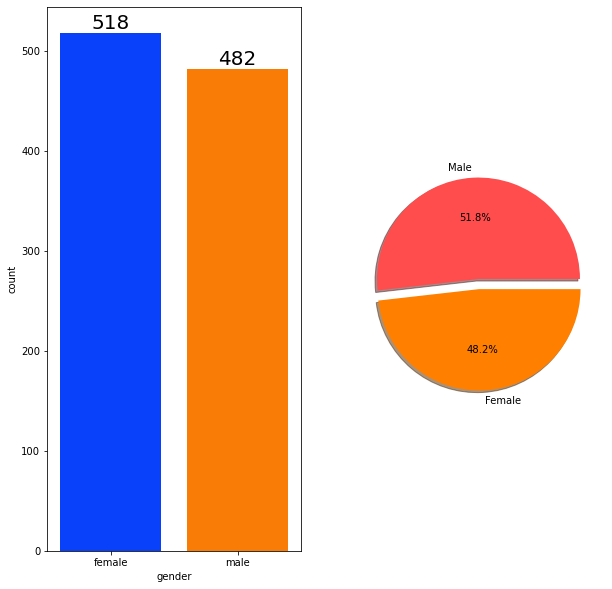

In [33]:
f,ax=plt.subplots(1,2,figsize=(10,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
 - Gender has balanced data with female students are 518(48%) and male students are 482(52%)

### Univariate Analysis 
#### ( Is gender has any impact on student's performance ? )

In [34]:
gender_group= df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [35]:
gender_group['math score'][0]

63.633204633204635

In [36]:
gender_group['Average'][0]

69.56949806949807

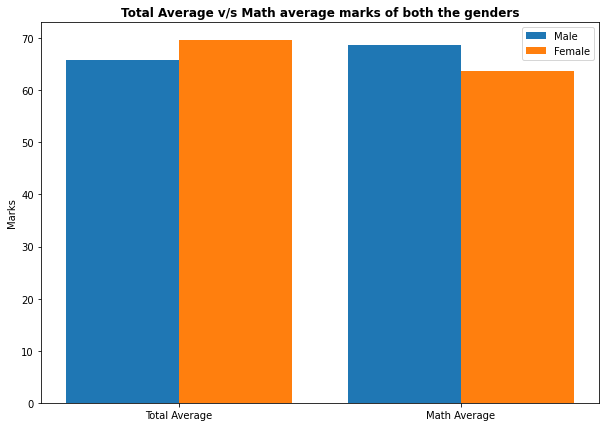

In [37]:
plt.figure(figsize=(10,7))
X=['Total Average','Math Average']

female_scores= [gender_group['Average'][0],gender_group['math score'][0]]
male_score= [gender_group['Average'][1],gender_group['math score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, male_score,0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores,0.4, label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total Average v/s Math average marks of both the genders",fontweight='bold')
plt.legend()
plt.show()

### Insights
 - On an average females have a better overall performance than men.
 - whereas males have scored higher in maths.

### RACE/ETHINICITY Column:- 
 - How is grupwise distribution.
 - Is race/ethnicity has any impact on student's performance?

### **UNIVARIATE ANLYSIS (How is groupwise distribution)**

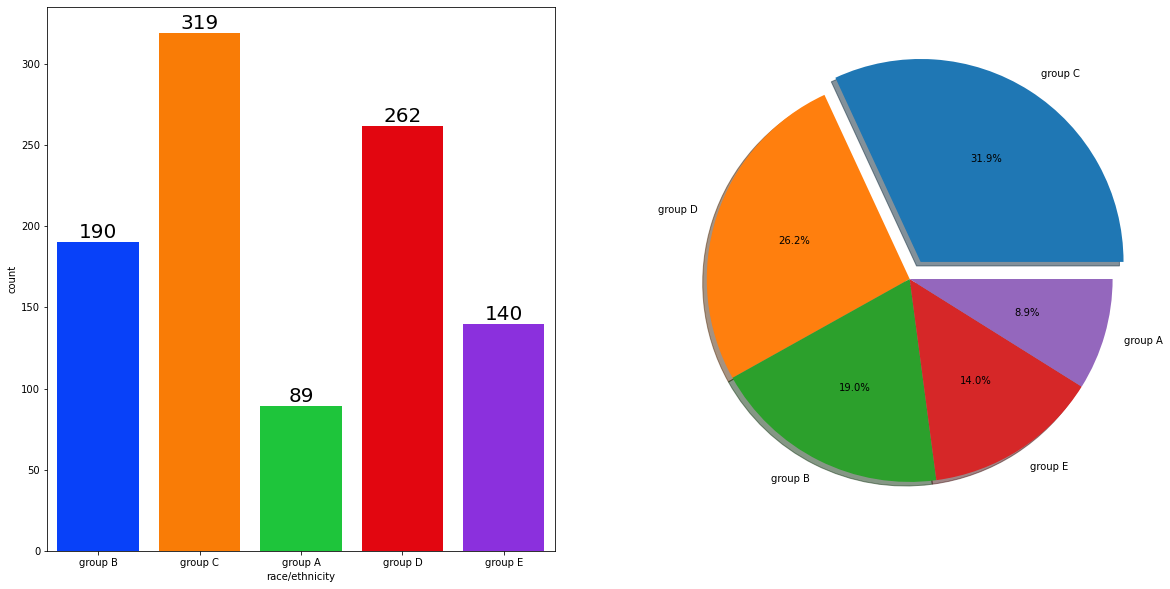

In [38]:
f,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights
 - Most of students belongs to Group C and Group D. 
 - Lowest Number of students belongs to Group A.

### BIVARIATE ANALYSIS (Is race/ethnicity has any impact on student's performance ?)

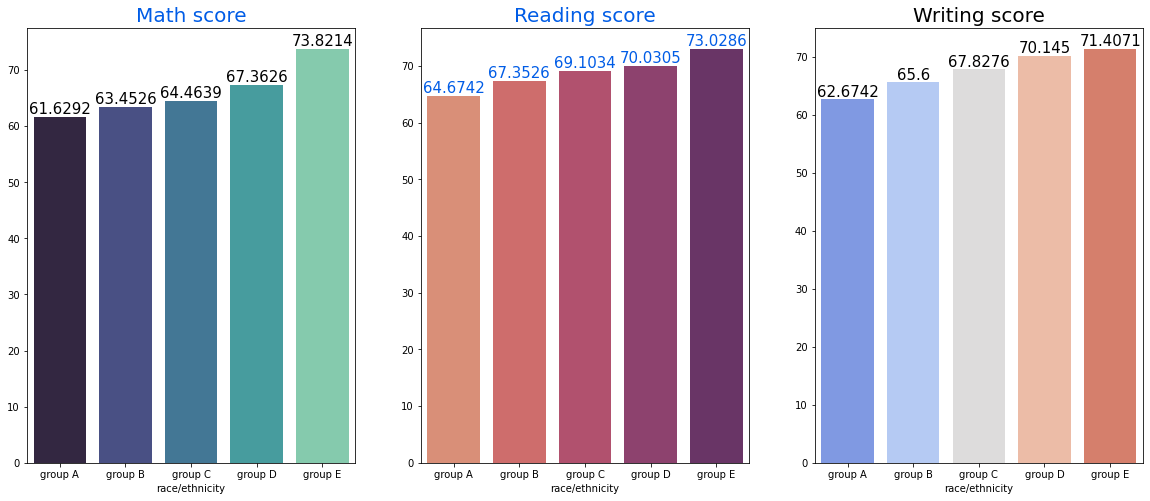

In [39]:
Group_data2 = df.groupby('race/ethnicity')
f,ax= plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='#005ce6',size=15)
    
sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='black',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
 - Group E students have scored the highest marks. 
 - Group A students have scored the lowest marks. 
 - students from lower socioeconomic status have a lower avg in all course subjects

### UNIVARIATE ANALYSIS (What is educational of student's parents)

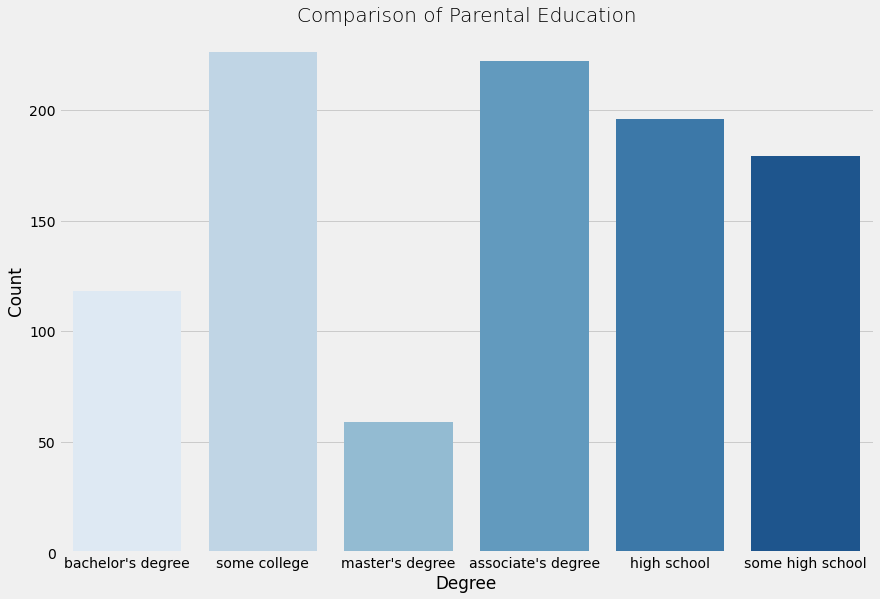

In [40]:
plt.rcParams['figure.figsize']=(13,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

### Insights
 - Largest number of parents are from some college

### BIVARIATE ANALYSIS (Is parental Education has any impact on student's Performance)

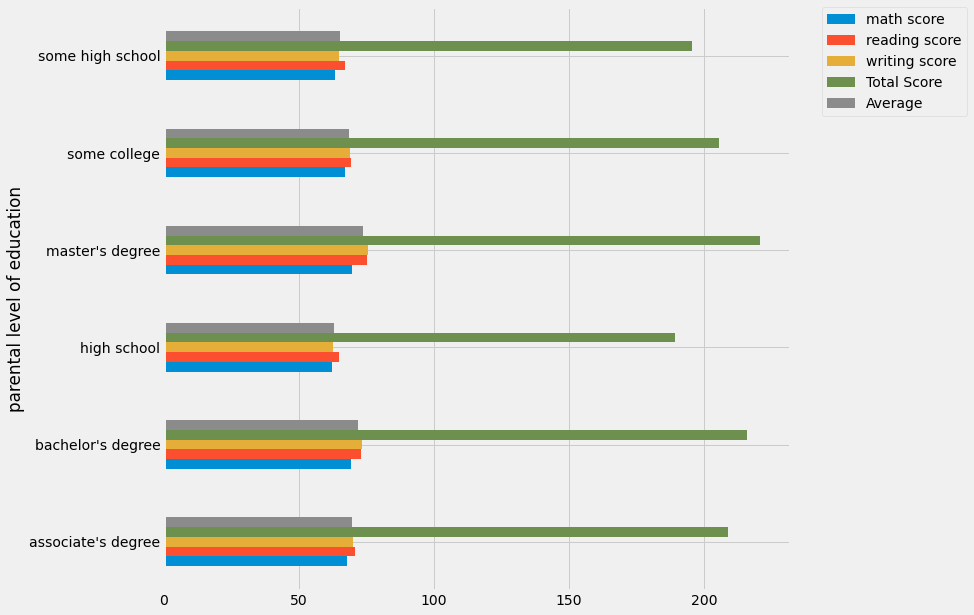

In [41]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.show()

### Insights
 - the score of student whose parents posses master and bachelor level of education are higher than others

### LUNCH COLUMN
 - Which type of lunch is most common amoung students ?
 - What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


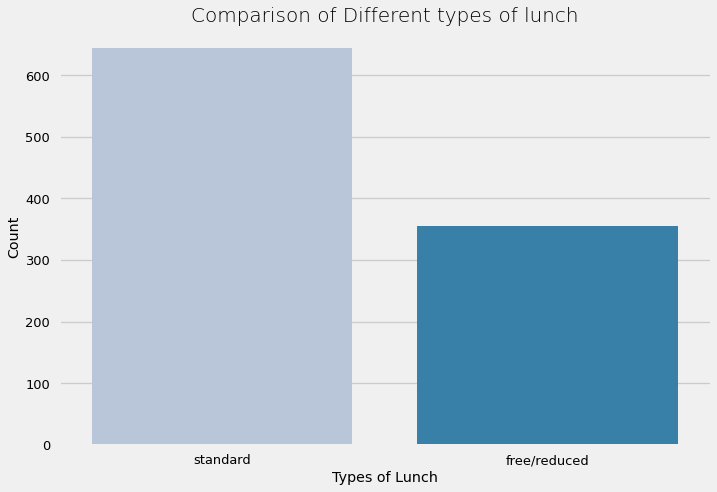

In [42]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of Different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

### Insights
 - Students have served standard lunch than free lunch.

### BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance)

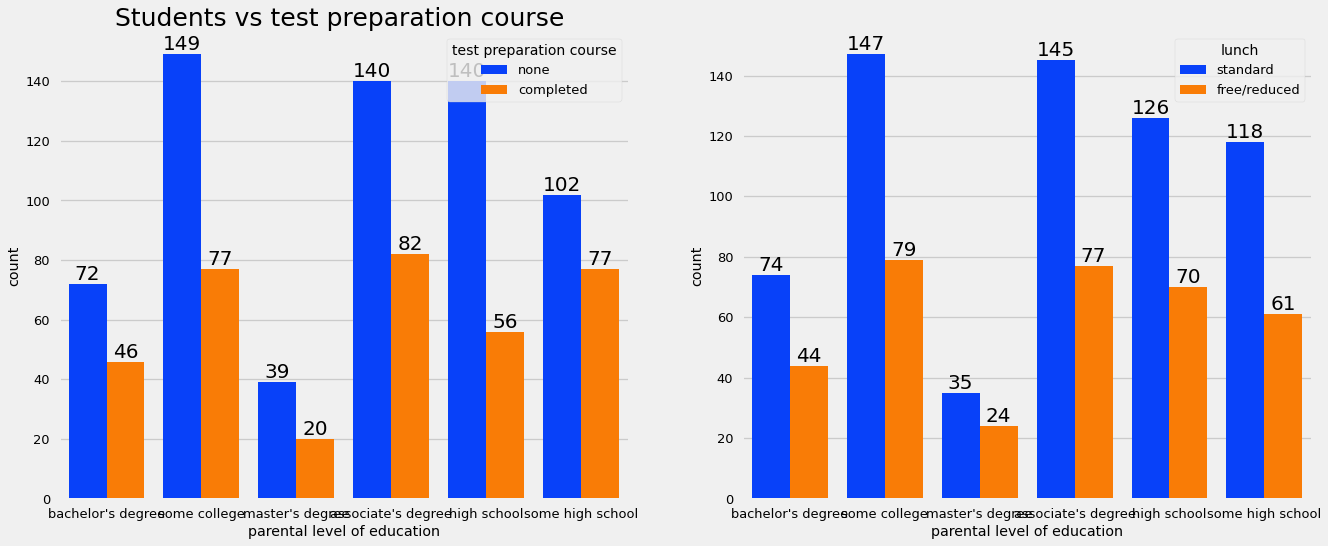

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

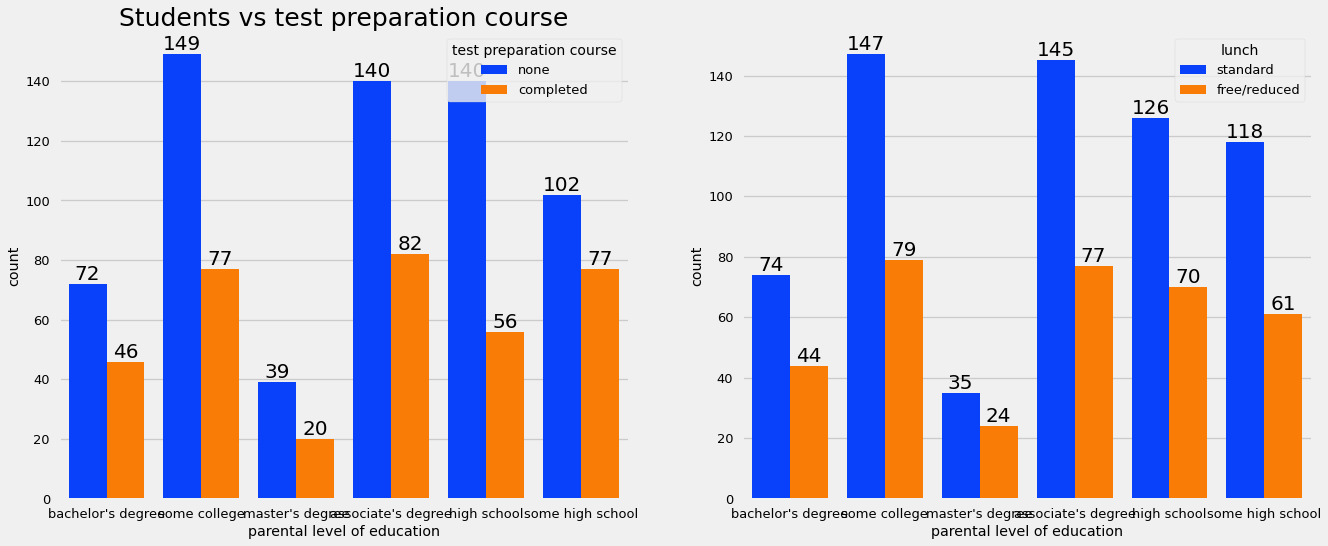

In [44]:
f,ax= plt.subplots(1,2,figsize=(20,8))

sns.countplot(x=df['parental level of education'],data=df, palette='bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black',size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df, palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### Insights
 - students who have got standard lunch performs better than students who have got free lunch

### TEST PREPARATION COURSE COLUMN
 - Which type of lunch is most common amoung students ?
 - Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )


<AxesSubplot:xlabel='lunch', ylabel='writing score'>

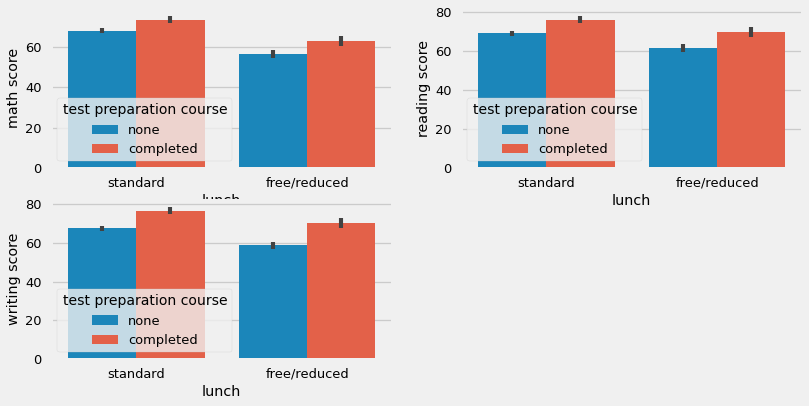

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


<AxesSubplot:xlabel='lunch', ylabel='writing score'>

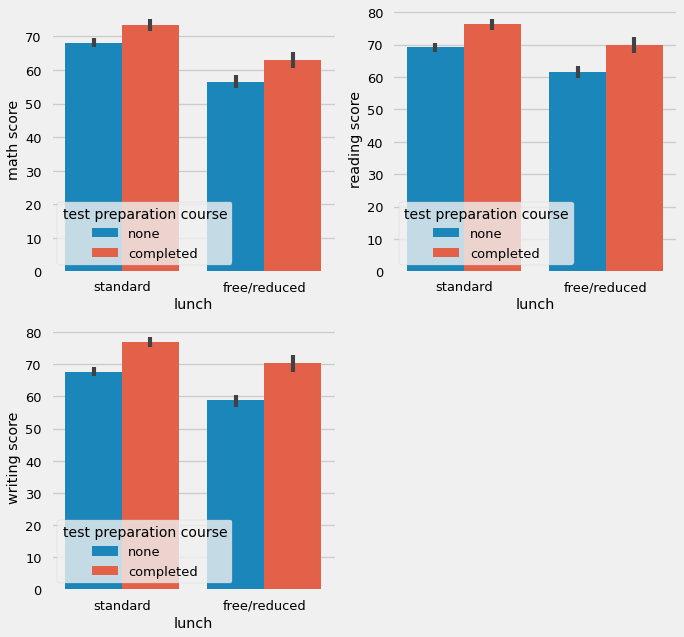

In [46]:
plt.subplots(1,2,figsize=(10,10))
plt.subplot(221)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])

plt.subplot(222)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])

plt.subplot(223)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])

### Insights:- 
 - student who have prepared the test preparation course have score higher in all three categories than those havent taken the course

### Checking the Outliers:-- 

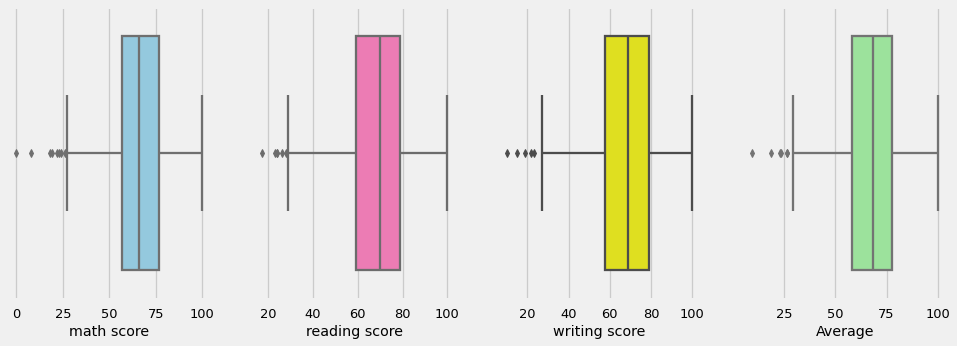

In [51]:
plt.subplots(1,4, figsize= (15,5))

plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'], color='lightgreen')
plt.show()


### MultiVariate Analysis Using Pairplot 

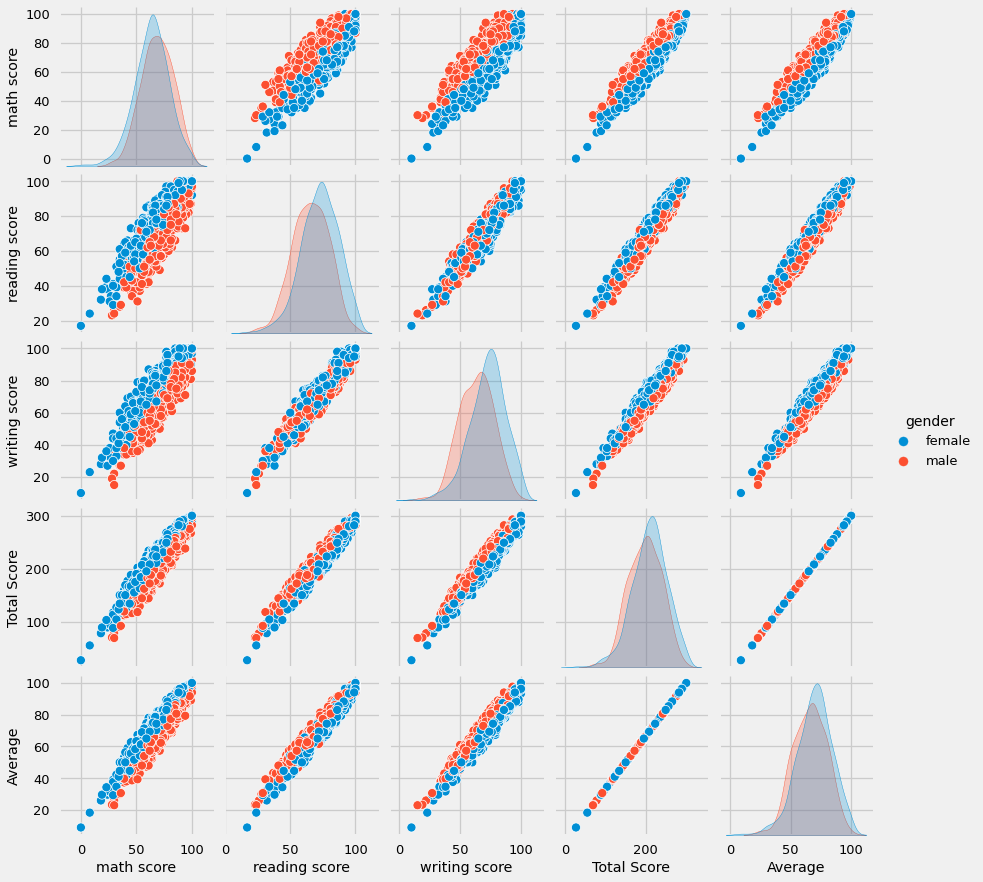

In [52]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
 - from the above plot it is clear that all the scores increases linearly with each other

## Conclusion:-
 - Student's performance is related with lunch, race, Parental level of education.
 - Female's lead in pass percentage and also top scorers.
 - Student's performance is not much related with test preparation course. 
 - Finishing preparation course is beneficial. 